<a href="https://colab.research.google.com/github/LokeshVadlamudi/MachineLearningClass/blob/master/german_data_credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Data Preparation - Converted both german.data and numeric data into csv and also used textToColumns option in excel to convert the data in single columns to multiple columns.
After that, Compared the german.data with german data numeric csv and found the relevant column names. and processed the final dataset as data-numeric.csv

The column order is 

statusCheckingAccount	DurationInMonth	CreditHistory	CreditAmount	SavingsAccount	PresentEmployment	PersonalStatusSex	PresentResidentSince	Property	AgeInYears	OtherInstallmentPlans	NumberOfCredits	NumberOfLiablePeople	Telephone	ForeignWorker	Purpose1	Purpose2	OtherDebt1	OtherDebt2	House-1	House-2	Job1	Job2	Job3	CreditRating

In [0]:
df = pd.read_csv('/content/drive/My Drive/data-numeric.csv')

**Business Case and Value**:
This dataset classifies people described by a set of attributes as good or bad credit risks. Using this dataset, we can create a model that can predict future customer's credit risks. This kind of data is very much useful in financial sector as the number of applications flood the banks for loans everyday. Initial screening can be done by this model as it reduces significant loan applications that have no potential to get approved.

In [399]:
df

,statusCheckingAccount,DurationInMonth,CreditHistory,CreditAmount,SavingsAccount,PresentEmployment,PersonalStatusSex,PresentResidentSince,Property,AgeInYears,OtherInstallmentPlans,NumberOfCredits,NumberOfLiablePeople,Telephone,ForeignWorker,Purpose1,Purpose2,OtherDebt1,OtherDebt2,House-1,House-2,Job1,Job2,Job3,CreditRating
0,1,6,4,12,5,5,3,4,1,67,3,2,1,2,1,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,3,1,1,1,1,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,3,1,2,1,1,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,3,1,2,1,1,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,3,2,2,1,1,1,0,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12,2,17,1,4,2,4,1,31,3,1,1,1,1,0,0,1,0,0,1,0,1,0,1
996,1,30,2,39,1,3,1,4,2,40,3,1,1,2,1,0,1,1,0,0,1,0,0,0,1
997,4,12,2,8,1,5,3,4,3,38,3,1,1,1,1,0,0,1,0,0,1,0,0,1,1
998,1,45,2,18,1,3,3,4,4,23,3,1,1,2,1,0,0,1,0,0,0,0,0,1,2


In [400]:
df.isnull().sum()

statusCheckingAccount    0
DurationInMonth          0
CreditHistory            0
CreditAmount             0
SavingsAccount           0
PresentEmployment        0
PersonalStatusSex        0
PresentResidentSince     0
Property                 0
AgeInYears               0
OtherInstallmentPlans    0
NumberOfCredits          0
NumberOfLiablePeople     0
Telephone                0
ForeignWorker            0
Purpose1                 0
Purpose2                 0
OtherDebt1               0
OtherDebt2               0
House-1                  0
House-2                  0
Job1                     0
Job2                     0
Job3                     0
CreditRating             0
dtype: int64

There are no null values in the dataset. we are good to go


#pearson Correlation matrix

In [401]:
np.corrcoef(df[::-1], y=None)

array([[1.        , 0.9106112 , 0.61096814, ..., 0.68965371, 0.98483634,
        0.48196912],
       [0.9106112 , 1.        , 0.65611887, ..., 0.6374344 , 0.84684615,
        0.48473752],
       [0.61096814, 0.65611887, 1.        , ..., 0.9695727 , 0.49924178,
        0.96825541],
       ...,
       [0.68965371, 0.6374344 , 0.9695727 , ..., 1.        , 0.60633605,
        0.95914776],
       [0.98483634, 0.84684615, 0.49924178, ..., 0.60633605, 1.        ,
        0.37476221],
       [0.48196912, 0.48473752, 0.96825541, ..., 0.95914776, 0.37476221,
        1.        ]])

#SNS heat map

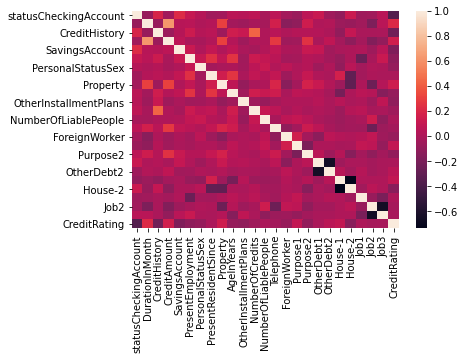

In [402]:
sns.heatmap(df.corr())

As you can see, few variables are correlated, like DurationInMonth, CreditAmount, Property, Purpose1, House-1

**Data Visualization:**

In [403]:
df['CreditRating'].value_counts()

1    700
2    300
Name: CreditRating, dtype: int64

Good credit ratings outweighs bad credit ratings

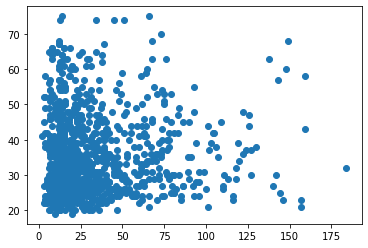

In [404]:
plt.scatter(df['CreditAmount'],df["AgeInYears"])

more Younger people tend to have bigger credit amounts

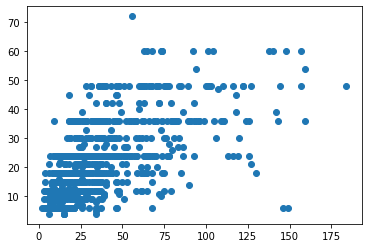

In [405]:
plt.scatter(df['CreditAmount'],df["DurationInMonth"])

The above plot shows that generally, more the duration , more the credit amount

Text(-40, 30, 'Frequency')

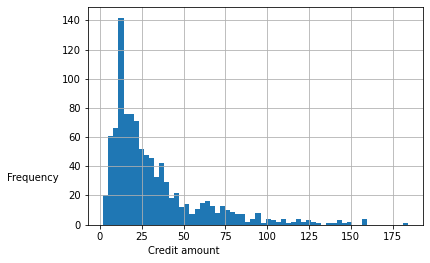

In [406]:
plot1 = df['CreditAmount'].hist(bins = 60)
plot1.text(50,-20,'Credit amount', ha='center')
plot1.text(-40,30,'Frequency', ha='center')

Most of the people have credit amount less than 25k

Text(0, 30, 'Frequency')

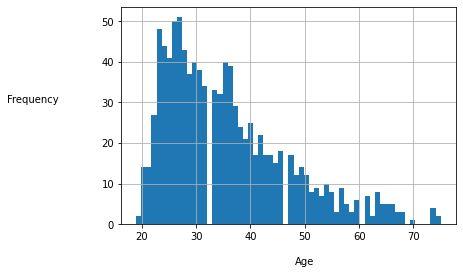

In [407]:
plot1 = df['AgeInYears'].hist(bins = 60)
plot1.text(50,-10,'Age', ha='center')
plot1.text(0,30,'Frequency', ha='center')

Most people in this dataset have age between 23 and 40

In [408]:
df['Job3'].value_counts()

1    630
0    370
Name: Job3, dtype: int64

Majority of the people are skilled workers

**skilled worker vs credit amount**

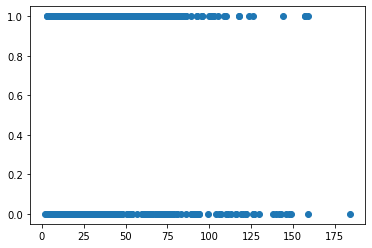

In [409]:
plt.scatter(df['CreditAmount'],df["Job3"])

Text(0.5, 1.0, 'Credit amount -- Distribution Plot')

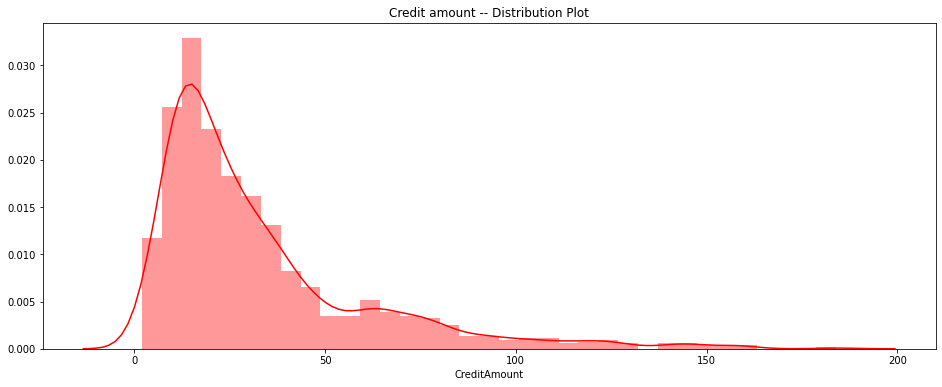

In [410]:
plt.figure(figsize=(16, 6))
sns.distplot(df['CreditAmount'], kde = True, color = 'red', label = 'Credit amount').set_title('Credit amount -- Distribution Plot')

**DataPreparation before applying models.**

Lets use PCA to reduce the dimensions as we have more than 20 features


**PCA**

In [411]:
pca_final = PCA(n_components=5)
principalComponents = pca_final.fit_transform(df[::-1])
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2','pc3','pc4','pc5'])
finalDf = pd.concat([principalDf, df[['CreditRating']]], axis = 1)
finalDf

,pc1,pc2,pc3,pc4,pc5,CreditRating
0,19.502507,-11.711038,-17.672713,-0.318125,0.119226,1
1,-7.359081,-16.583569,-25.040108,-1.411319,0.811493,2
2,-26.190237,3.020617,0.997863,-0.046327,-1.472907,1
3,8.673958,3.197005,-7.513488,-1.760278,1.026648,1
4,-17.671274,-3.611227,4.700148,-0.166723,-1.218054,2
...,...,...,...,...,...,...
995,16.719109,17.297782,-1.078603,-1.997588,0.668039,1
996,50.479827,7.635788,-8.345711,-1.752151,0.487828,1
997,-13.630678,14.288413,3.031589,-0.387237,-2.035617,1
998,33.691383,-16.691967,-15.757691,-1.238190,-0.098438,2


**if PCA is not Applied**, taking variables that are correlated based on sns heat map

In [0]:
xcol = ['DurationInMonth','CreditAmount', 'Property', 'Purpose1', 'House-1']
ycol = ['CreditRating']

In [0]:
dfx = df[xcol]
dfy = df[ycol]

In [0]:
# pca_final = PCA(n_components=4)
# principalComponents = pca_final.fit_transform(dfx)
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['pc1', 'pc2','pc3','pc4'])

**splitting the data (both pca applied and not applied) **

In [0]:
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.33)
# X_train, X_test, y_train, y_test = train_test_split(principalDf, finalDf['CreditRating'], test_size=0.33)

**Logistic Regression**

In [416]:
clf = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
y_pred = clf.predict(X_test)

In [418]:
accuracy_score(y_test,y_pred)

0.7606060606060606

In [419]:

confusion_matrix(y_test, y_pred)

array([[231,  13],
       [ 66,  20]])

In [420]:

classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           1       0.78      0.95      0.85       244\n           2       0.61      0.23      0.34        86\n\n    accuracy                           0.76       330\n   macro avg       0.69      0.59      0.60       330\nweighted avg       0.73      0.76      0.72       330\n'

**Linear Regression**

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
clf = LinearRegression().fit(X_train, y_train)

In [0]:
y_pred = clf.predict(X_test)

In [424]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.38028066488877915
Mean Squared Error: 0.17937630476965843
Root Mean Squared Error: 0.42352839901198885


In [0]:
# from sklearn.metrics import confusion_matrix
# confusion_matrix(y_test, y_pred)

In [0]:
# classification_report(y_test, y_pred)

**XGBoost**

In [427]:
model = XGBClassifier()
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [428]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.64%


In [429]:

confusion_matrix(y_test, y_pred)

array([[221,  23],
       [ 64,  22]])

In [430]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           1       0.78      0.91      0.84       244\n           2       0.49      0.26      0.34        86\n\n    accuracy                           0.74       330\n   macro avg       0.63      0.58      0.59       330\nweighted avg       0.70      0.74      0.71       330\n'

**SVM**

In [0]:
#Import svm model


# clf = svm.SVC(kernel='linear')

# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

In [0]:
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

**Random Forests**

In [433]:
#Import Random Forest Model


clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [434]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6878787878787879


In [435]:

confusion_matrix(y_test, y_pred)

array([[198,  46],
       [ 57,  29]])

In [436]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           1       0.78      0.81      0.79       244\n           2       0.39      0.34      0.36        86\n\n    accuracy                           0.69       330\n   macro avg       0.58      0.57      0.58       330\nweighted avg       0.67      0.69      0.68       330\n'

**KNN**

In [437]:


model = KNeighborsClassifier(n_neighbors=6)

model.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [438]:
y_pred=model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7333333333333333


In [439]:

confusion_matrix(y_test, y_pred)

array([[225,  19],
       [ 69,  17]])

In [440]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           1       0.77      0.92      0.84       244\n           2       0.47      0.20      0.28        86\n\n    accuracy                           0.73       330\n   macro avg       0.62      0.56      0.56       330\nweighted avg       0.69      0.73      0.69       330\n'

**Naive Bayes**

In [441]:


model = GaussianNB()

model.fit(X_train,y_train)

y_pred=model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7575757575757576


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [442]:

confusion_matrix(y_test, y_pred)

array([[223,  21],
       [ 59,  27]])

In [443]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           1       0.79      0.91      0.85       244\n           2       0.56      0.31      0.40        86\n\n    accuracy                           0.76       330\n   macro avg       0.68      0.61      0.63       330\nweighted avg       0.73      0.76      0.73       330\n'

**KMeans Clustering**


In [0]:
X = np.asarray(df[["DurationInMonth", "CreditAmount","AgeInYears"]])
X = np.log(X)

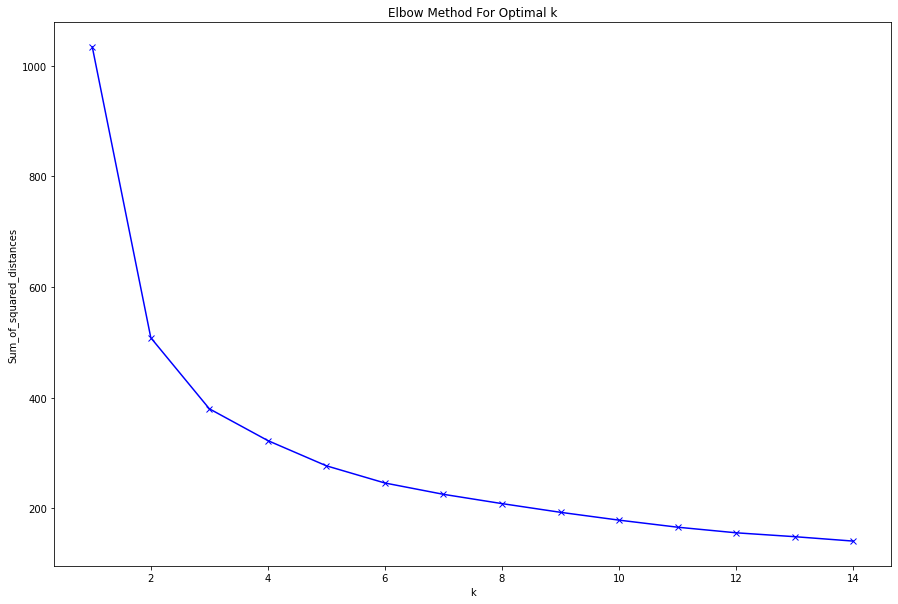

In [445]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(15,10))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

We take k = 3 as per elbow method

In [446]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.labels_

array([2, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 1, 0, 0, 1, 2, 2, 1, 1, 0, 2, 2, 0, 2, 1, 1,
       1, 2, 0, 2, 1, 0, 0, 1, 2, 0, 0, 2, 1, 1, 0, 1, 2, 2, 0, 1, 0, 1,
       0, 2, 0, 0, 1, 2, 2, 1, 0, 2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1,
       0, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 1, 1,
       0, 0, 1, 2, 1, 2, 0, 0, 2, 1, 0, 0, 0, 1, 2, 2, 1, 0, 2, 2, 1, 1,
       1, 2, 2, 2, 0, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 1,
       0, 2, 0, 2, 1, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 2,
       0, 0, 2, 2, 1, 2, 2, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 2,
       2, 2, 2, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2,
       1, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 2, 1, 0, 0, 0, 2, 2, 0, 1, 0,
       2, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 2,

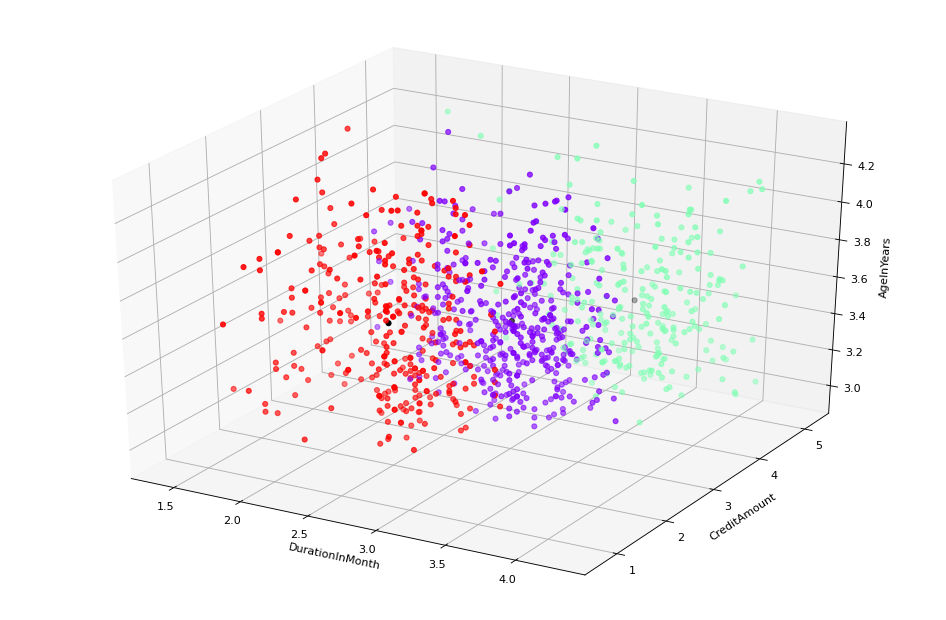

In [447]:
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(X[:,0], X[:,1], X[:,2], c=kmeans.labels_, cmap='rainbow')
ax.scatter3D(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c='black')

xLabel = ax.set_xlabel('DurationInMonth', linespacing=3.2)
yLabel = ax.set_ylabel('CreditAmount', linespacing=3.1)
zLabel = ax.set_zlabel('AgeInYears', linespacing=3.4)

**Conclusion**


Due to less training data and slightly imbalanced class labels, we are only able to attain little over 70 percentage accuracy. But after applying PCA, we get better results with consistency as we have to deal with lesser features.